### Exploratory Data Analysis on Vintage cars Dataset

<p>I obtained this dataset from the following <a href="https://perso.telecom-paristech.fr/eagan/class/igr204/datasets">link</a></p>
<p>I have no knowledge about the features or their description. I only have the data in the above website interms of csv and will take help from google to understand and make sense of the features.</p>

<p>Lets describe each feature we have in dataset. We will then have an idea of what we have and what we can do with the dataset. </p>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

cars = pd.read_csv('cars.csv')
cars.head()

,Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin
0,STRING;DOUBLE;INT;DOUBLE;DOUBLE;DOUBLE;DOUBLE;...
1,Chevrolet Chevelle Malibu;18.0;8;307.0;130.0;3...
2,Buick Skylark 320;15.0;8;350.0;165.0;3693.;11....
3,Plymouth Satellite;18.0;8;318.0;150.0;3436.;11...
4,AMC Rebel SST;16.0;8;304.0;150.0;3433.;12.0;70;US


The first row contains columns, second has data types of columns. Also, the first column has car names (string), the rest are all numerical columns. We can format the data in read_csv function using it's parameters itself

In [70]:
cars = pd.read_csv('cars.csv', skiprows=[1], sep=';')
cars.head(10)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US
5,Ford Galaxie 500,15.0,8,429.0,198.0,4341.0,10.0,70,US
6,Chevrolet Impala,14.0,8,454.0,220.0,4354.0,9.0,70,US
7,Plymouth Fury iii,14.0,8,440.0,215.0,4312.0,8.5,70,US
8,Pontiac Catalina,14.0,8,455.0,225.0,4425.0,10.0,70,US
9,AMC Ambassador DPL,15.0,8,390.0,190.0,3850.0,8.5,70,US


In [3]:
cars.columns

Index(['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model', 'Origin'],
      dtype='object')

## Feature Description

<p><b>MPG</b> - mpg stands for Miles Per Gallon – a measure of how far a car can travel if you put just one gallon of petrol or diesel in its tank. This standardised figure helps you compare cars based on their efficiency.  <span style='font-size: 10px'><a href='https://www.carwow.co.uk/guides/running/what-is-mpg-0255'>Source</a></span></p>
 -- Higher the MPG, better the fuel efficiency

<p><b>Cylinders</b> - A cylinder is the power unit of an engine. It's the chamber where the gasoline is burned and turned into power. Most cars and SUV engines have four, six, or eight cylinders.   <span style='font-size: 10px'><a href='https://www.vroomgirls.com/cylinder-whats-a-cylinder/'>Source</a></span></p>
-- More Cylinders generate more power. 

<p><b>Displacement (cubic inches)</b> - Engine displacement is the combined swept volume of the pistons inside the cylinders of an engine. It is the total volume of all the cylinders in an engine. An engine with four cylinders of 569cc each totals 2276cc, and will be rounder off and referred to as a 2.3 liter engine. Displacement is an important factor, as it has a direct impact on an engine's power output, fuel efficiency, and in some countries, how a vehicle is taxed.   <span style='font-size: 10px'><a href='https://www.yourmechanic.com/article/what-is-engine-displacement'>Source</a></span></p>
    <figure><img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/Displacement.gif" /><figcaption style="text-align: center"><i>One complete cycle of a four-cylinder, four-stroke engine. The volume displaced is marked in orange.</i></figcaption></figure>
-- High displacement means high cu in, not necessarily high number of cylinders though they are indirectly linked

<p><b>HorsePower (rpm)</b> - The power an engine produces is called horsepower. In mathematical terms, one horsepower is the power needed to move 550 pounds one foot in one second.   <span style='font-size: 10px'><a href='https://auto.howstuffworks.com/difference-between-torque-and-horsepower.html'>Source</a></span></p>
-- more power, more acceleration and speed. high speed cars have high horse power

<p><b>Weight (Pounds)</b> - Weight of the car in Kgs </p>
-- more Weight needs more horse power. Weight curbs car's speed and acceleration

<p><b>Acceleration (seconds per 50 mph)</b> - Seconds needed to reach 50mph or seconds to travel a mile. ( guess as couldn't find proper data. acceleration is decreasing with horse power, so it ot to be seconds. let's find out with some visualizations ) </p>
-- more acceleration means more time to travel a distance and slower car

<p><b>Model (Year in 1900's)</b> - Model of car. (either 1990's or early 2000's, just last 2 digits are mentioned) </p>
-- We can check for insights or patterns of cars originated in particular year or span of years.

<p><b>Origin (Country Code)</b> - country Origin of car. Mentioned in country code. </p>
-- We can check for insights or patterns of cars originated in particular country or continent.


### Other Information
<p>Generally speaking, the higher an engine’s displacement the more power it can create, while the lower the displacement the less fuel it can consume. This is because displacement has a direct impact on how much fuel must be drawn into a cylinder to create power and maintain engine operation. A high-displacement engine draws in more of the air/fuel mixture per revolution; therefore more fuel is consumed. Other factors play into how powerful or efficient an engine is, such as fuel delivery, ignition systems, valvetrain layout, and forced induction, but in the simplest terms a bigger engine will be more powerful, and a smaller engine will be more efficient.</p>


Depending on the theoretical information we know, a car's price:
<p>Increases with increase in
    <ul>
        <li>Mpg</li>
        <li>cylinders</li>
        <li>Displacement</li>
        <li>Horse Power</li>
    </ul>
</p>
<p>Decreases with increase in
    <ul>
        <li>Weight</li>
        <li>acceleration</li>
    </ul>
</p>
Car model and Origin might affects the price too.

In [4]:
type(cars)

pandas.core.frame.DataFrame

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
Car             406 non-null object
MPG             406 non-null float64
Cylinders       406 non-null int64
Displacement    406 non-null float64
Horsepower      406 non-null float64
Weight          406 non-null float64
Acceleration    406 non-null float64
Model           406 non-null int64
Origin          406 non-null object
dtypes: float64(5), int64(2), object(2)
memory usage: 28.6+ KB


No null values

In [6]:
cars.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


minimum value of MPG and Horsepower are 0. This should be a missing value filled with 0 as cars cannot have 0 HP or MPG

### Univariate Analysis

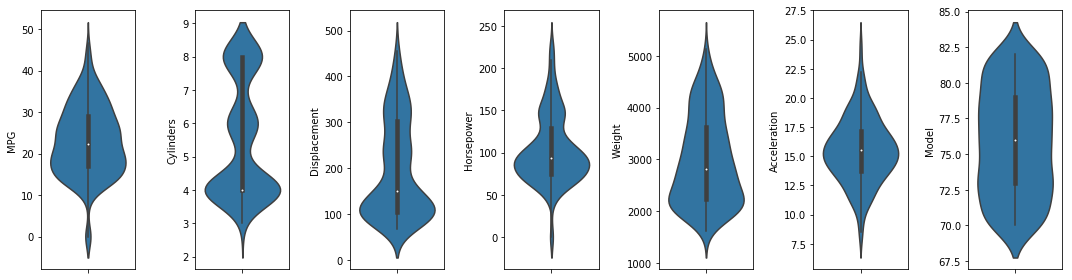

In [7]:
numeric_cols = list(cars.drop(columns=['Car', 'Origin']).columns)

fig, axes = plt.subplots(1, 7, figsize=(15, 4))
for i in range(len(numeric_cols)):
    sns.violinplot(y=cars[numeric_cols[i]], ax=axes.flatten()[i])

fig.tight_layout()
plt.show()

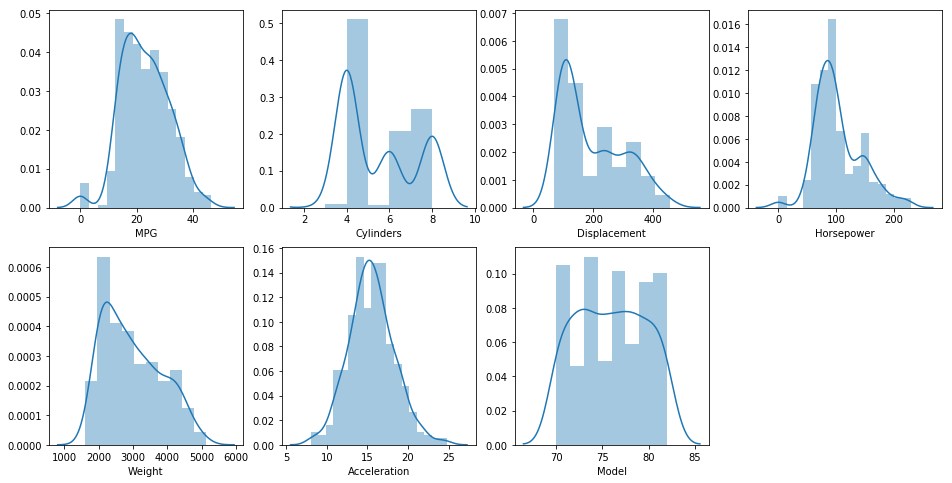

In [8]:
# distplot
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i in range(len(numeric_cols)):
    sns.distplot(cars[numeric_cols[i]], ax=axes.flatten()[i])
    
plt.delaxes(axes.flatten()[-1])
plt.show()

### Bivariate Analysis

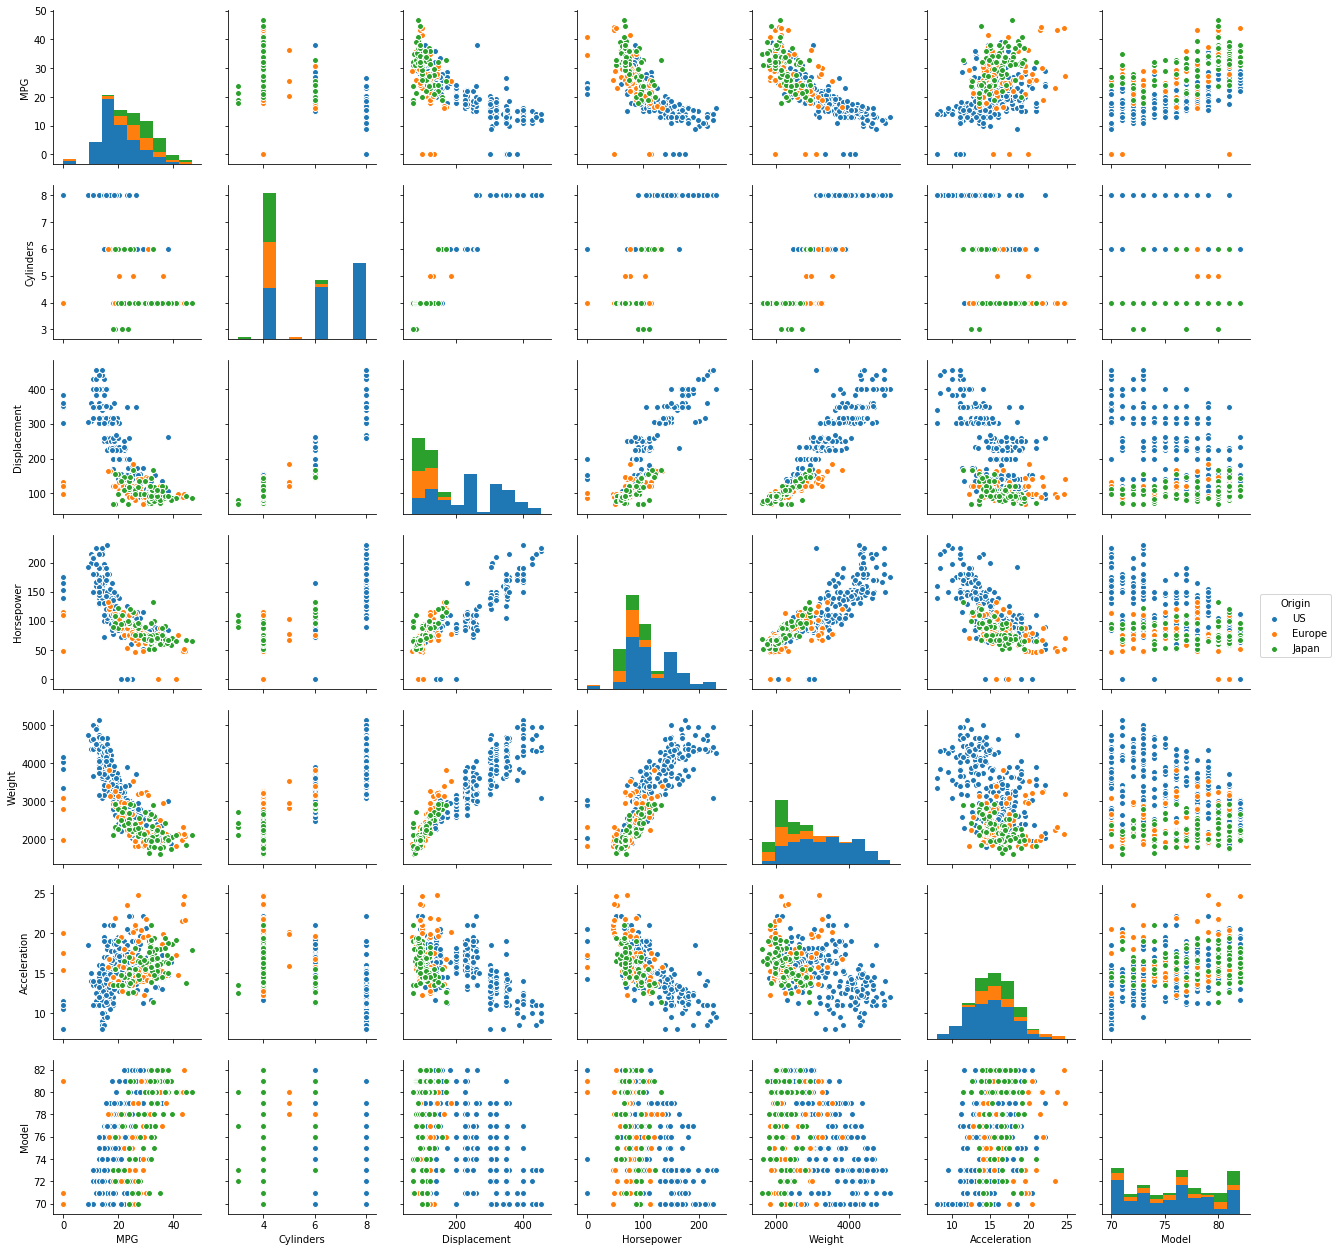

In [9]:
sns.pairplot(cars, hue='Origin')

Some trends we observe here:
<p><b>MPG: </b>
    <ul>
        <li>Displacement - negative exponential relationship</li>
        <li>Horsepower, Weight - negative linear relationship</li>
    </ul>
</p>
<p><b>Cylinders: </b>
    <ul>
        <li>Displacement - exponential relationship</li>
        <li>Horsepower, Weight - linear relationship</li>
    </ul>
</p>
<p><b>Displacement: </b>
    <ul>
        <li>Horsepower, Weight - linear relationship</li>
    </ul>
</p>
<p><b>Horsepower: </b>
    <ul>
        <li>Aceeleration - negative linear relationship</li>
        <li>Displacement, Weight - linear relationship</li>
    </ul>
</p>

### Origin Differences
<p><b>US:</b>
    <ul>
        <li>High - Cylinders, Displacement, Horsepower, Weight</li>
        <li>Low - Acceleration, MPG</li>
    </ul> 
</p>
<p><b>Japan</b> and <b>Europe</b> have similar properties, low in Cylinders, Displacement, Horsepower and weight. </p>
<p>The dataset contains more samples from US than Japan and Europe combined.</p>

### Feature Dependence

<p>More Cylinders, More Weight and more displacement and in turn more horsepower due to more fuel consumption. This reduces the car's MPG</p>
<p>According to above pairplot, the acceleration reduces too with increase in horsepower. In general, acceleration increases with horsepower, so we have to find out the reason for negative relationship between these two.</p>
<p>So, Cylinders, MPG, Weight, Displacement, Horsepower, acceleration are all dependent on each other though there are variations in dependency among them</p>
<p>Car model on the other hand show's no relationship with any other feature.</p>

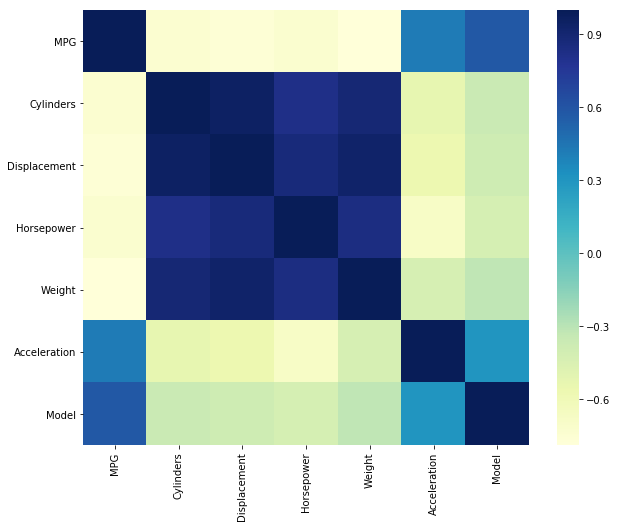

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cars.corr(), cmap='YlGnBu', ax=ax)

- Positive correlation among Cylinders, Displacement, Horsepower, Weight.
- Negative correlation for MPG with the above 4
- No correlation among model and acceleration

### Missing values

We found using cars.info() that there are no missing values. But the minimum Horsepower and MPG values are 0. These are missing values entered as 0. We have to treat these 2 features using other features.
#### Ways to fill missing values
- we can take average of MPG and Horsepower and fill
- We can group by specific features and fill the values taking the average on those conditions
- We can build a model on other features using these missing value features as target variables and predict

<p>Since Horsepower has fairly strong correlation with Cylinders, Displacement and Weight whose values are all present, We can find it grouped by these features.</p>
<p>For MPG, we can do the same as it is in negative correlation with them. Or we can build a model on the remaining features to fill the missing MPG data.</p>

In [12]:
print("Horsepower 0 values: \n{}".format(cars['Horsepower'][cars['Horsepower'] == 0]))
print("\nMPG 0 values: \n{}".format(cars['MPG'][cars['MPG'] == 0]))
missing_hp_idx = cars[cars['Horsepower'] == 0].index.tolist()
missing_mpg_idx = cars[cars['MPG'] == 0].index.tolist()
missing_hp_idx, missing_mpg_idx

Horsepower 0 values: 
38     0.0
133    0.0
337    0.0
343    0.0
361    0.0
382    0.0
Name: Horsepower, dtype: float64

MPG 0 values: 
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
17     0.0
39     0.0
367    0.0
Name: MPG, dtype: float64


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
10,Citroen DS-21 Pallas,0.0,4,133.0,115.0,3090.0,17.5,70,Europe
11,Chevrolet Chevelle Concours (sw),0.0,8,350.0,165.0,4142.0,11.5,70,US
12,Ford Torino (sw),0.0,8,351.0,153.0,4034.0,11.0,70,US
13,Plymouth Satellite (sw),0.0,8,383.0,175.0,4166.0,10.5,70,US
14,AMC Rebel SST (sw),0.0,8,360.0,175.0,3850.0,11.0,70,US
17,Ford Mustang Boss 302,0.0,8,302.0,140.0,3353.0,8.0,70,US
39,Volkswagen Super Beetle 117,0.0,4,97.0,48.0,1978.0,20.0,71,Europe
367,Saab 900s,0.0,4,121.0,110.0,2800.0,15.4,81,Europe


Since the number of missing values are handful, building a model is not necessary as it wouldn't effect much.

### simple model for filling missing values
lets build a simple linear regression model on Cylinders, Displacement, Weight, Acceleration as feature variables and Horsepower as target variable

In [71]:
X_1 = ['Cylinders', 'Displacement', 'Weight', 'Acceleration']
y_1 = 'Horsepower'
features_1 = X_1[:] + [y_1]

linear_regression = LinearRegression()

train_X_1 = cars[X_1][cars[y_1] != 0]
train_y_1 = cars[y_1][cars[y_1] != 0]

linear_regression.fit(train_X_1, train_y_1)
y_1_pred = linear_regression.predict(cars[X_1][cars[y_1] == 0])

cars.loc[missing_hp_idx, y_1] = y_1_pred

pd.concat([train_y_1.describe(), cars[y_1].describe()], keys=['before', 'after'], axis=1)

,before,after
count,400.000000,406.000000
mean,105.082500,104.708611
std,38.768779,38.656427
min,46.000000,46.000000
25%,75.750000,75.250000
50%,95.000000,94.827807
75%,130.000000,129.000000
max,230.000000,230.000000


In [72]:
X_2 = ['Cylinders', 'Displacement', 'Weight', 'Acceleration']
y_2 = 'MPG'
features_2 = X_2[:] + [y_2]

train_X_2 = cars[X_2][cars[y_2] != 0]
train_y_2 = cars[y_2][cars[y_2] != 0]

linear_regression.fit(train_X_2, train_y_2)
y_2_pred = linear_regression.predict(cars[X_2][cars[y_2] == 0])

cars.loc[missing_mpg_idx, y_2] = y_2_pred

pd.concat([train_y_2.describe(), cars[y_2].describe()], keys=['before', 'after'], axis=1)

,before,after
count,398.000000,406.000000
mean,23.514573,23.435803
std,7.815984,7.807974
min,9.000000,9.000000
25%,17.500000,17.000000
50%,23.000000,23.000000
75%,29.000000,29.000000
max,46.600000,46.600000


In [81]:
print("Total N/A values after missing value treatment are : {}".format(cars.isnull().sum().sum()))
print("Check if only non-null values present in Dataframe : {}".format(cars.all().all()))

Total N/A values after missing value treatment are : 0
Check if only non-null values present in Dataframe : True


In [100]:
cars.nunique()

Car             308
MPG             137
Cylinders         5
Displacement     83
Horsepower       99
Weight          356
Acceleration     96
Model            13
Origin            3
dtype: int64

### Further Analysis

- We can do more analysis on the names of cars as there are many cars with minor specifications changes
- ALso, breaking the names might give us more information on the cars and their similar models.
- We have already seen the difference between US Origin cars to Europe and Japan in terms of Overall feature frequency. We can further compare cars of similar characteristics from different origins to better understand how one market leads the other in different aspects.